Calculate the NEP results

In [1]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
from calorine.calculators import CPUNEP

calc = CPUNEP('../potentials/4-4-80/nep.txt')
nep_data = {}

symbol_infos = [
SymbolInfo('Ag', 'fcc', 4.146),
SymbolInfo('Al', 'fcc', 4.042),
SymbolInfo('Au', 'fcc', 4.159),
SymbolInfo('Cu', 'fcc', 3.631),
SymbolInfo('Ni', 'fcc', 3.509),
SymbolInfo('Pb', 'fcc', 5.038),
SymbolInfo('Pd', 'fcc', 3.939),
SymbolInfo('Pt', 'fcc', 3.967),
SymbolInfo('Cr', 'bcc', 2.845),
SymbolInfo('Mo', 'bcc', 3.164),
SymbolInfo('Ta', 'bcc', 3.319),
SymbolInfo('V',  'bcc', 2.997),
SymbolInfo('W',  'bcc', 3.185),
SymbolInfo('Mg', 'hcp', 3.195, 5.186),
SymbolInfo('Ti', 'hcp', 2.931, 4.651),
SymbolInfo('Zr', 'hcp', 3.240, 5.157)
]

for symbol_info in symbol_infos:
    atoms = symbol_info.create_bulk_atoms((1,1,1))
    material_calculator = MaterialCalculator(atoms, calc, symbol_info)
    Cij = material_calculator.elastic_constant()
    nep_data[symbol_info.formula] = {}
    nep_data[symbol_info.formula]['C11'] = Cij[0][0]
    nep_data[symbol_info.formula]['C12'] = Cij[0][1]
    nep_data[symbol_info.formula]['C13'] = Cij[0][2]
    nep_data[symbol_info.formula]['C33'] = Cij[2][2]
    nep_data[symbol_info.formula]['C44'] = Cij[3][3]
    nep_data[symbol_info.formula]['C66'] = Cij[5][5]

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:57:16      -10.862692        0.0089
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:57:21      -14.966002        0.0222
BFGSLineSearch:    1[  2] 16:57:21      -14.966009        0.0000
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:57:25      -12.907792        0.0229
BFGSLineSearch:    1[  2] 16:57:25      -12.907796        0.0001
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:57:30      -14.896897        0.1638
BFGSLineSearch:    1[  2] 16:57:30      -14.897213        0.0046
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:57:35      -21.672411        0.0418
BFGSLineSearch:    1[  2] 16:57:35      -21.672426        0.0002
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0]

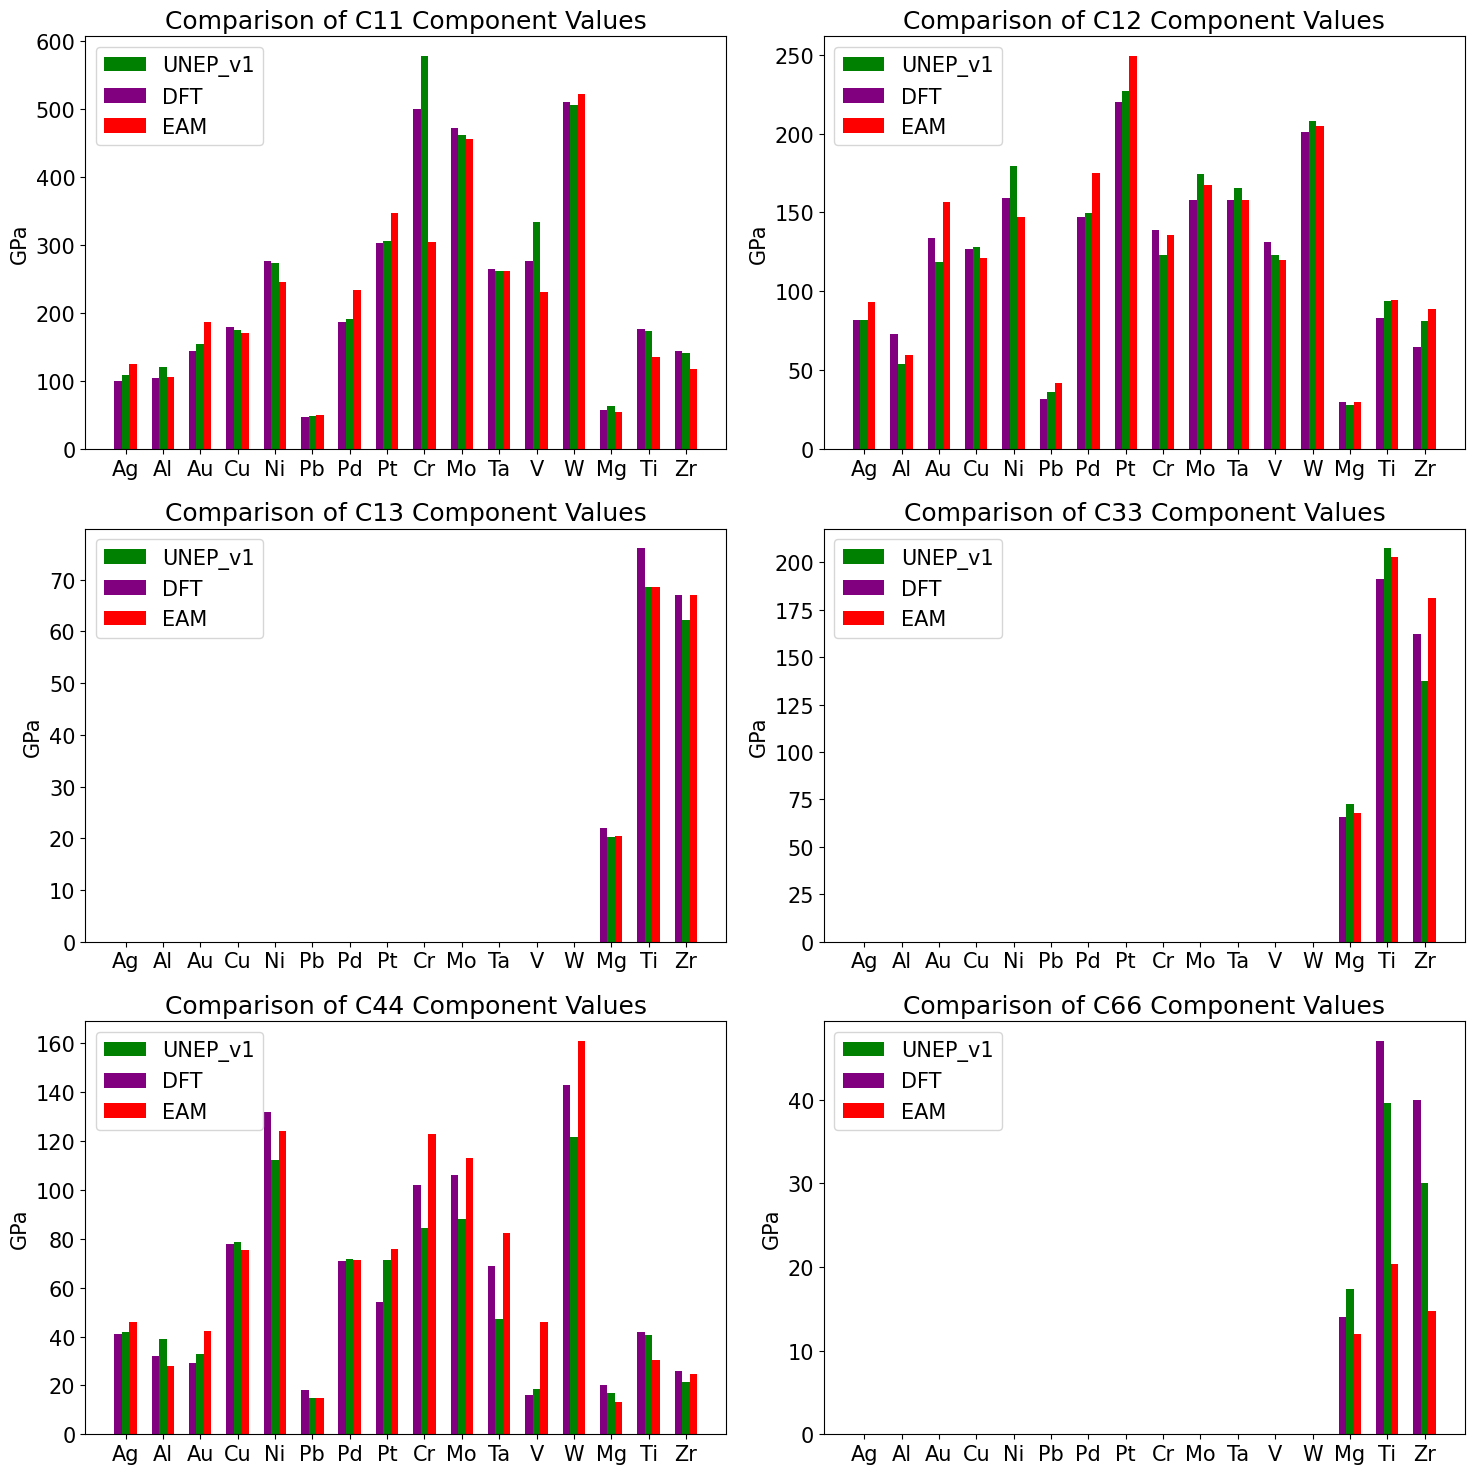

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

dft_data = {
    "Ag": {"C11": 100, "C12": 82, "C44": 41},
    "Al": {"C11": 104, "C12": 73, "C44": 32},
    "Au": {"C11": 144, "C12": 134, "C44": 29},
    "Cu": {"C11": 180, "C12": 127, "C44": 78},
    "Ni": {"C11": 276, "C12": 159, "C44": 132},
    "Pb": {"C11": 47,  "C12": 32,  "C44": 18},
    "Pd": {"C11": 187, "C12": 147, "C44": 71},
    "Pt": {"C11": 303, "C12": 220, "C44": 54},
    "Cr": {"C11": 499, "C12": 139, "C44": 102},
    "Mo": {"C11": 472, "C12": 158, "C44": 106},
    "Ta": {"C11": 265, "C12": 158, "C44": 69},
    "V":  {"C11": 276, "C12": 131, "C44": 16},
    "W":  {"C11": 510, "C12": 201, "C44": 143},
    "Mg": {"C11": 58,  "C12": 30,  "C13": 22,  "C33": 66,  "C44": 20,  "C66": 14},
    "Ti": {"C11": 177, "C12": 83,  "C13": 76,  "C33": 191, "C44": 42,  "C66": 47},
    "Zr": {"C11": 144, "C12": 65,  "C13": 67,  "C33": 162, "C44": 26,  "C66": 40},
}

eam_data = {
    "Ag": {"C11": 124.7, "C12": 93.4,  "C44": 46.1},
    "Al": {"C11": 106.5, "C12": 59.5,  "C44": 27.9},
    "Au": {"C11": 186.7, "C12": 156.9, "C44": 42.1},
    "Cu": {"C11": 170.0, "C12": 121.0, "C44": 75.5},
    "Ni": {"C11": 245.6, "C12": 147.0, "C44": 124.2},
    "Pb": {"C11": 49.6,  "C12": 42.1,  "C44": 15.0},
    "Pd": {"C11": 233.9, "C12": 175.0, "C44": 71.1},
    "Pt": {"C11": 346.4, "C12": 249.1, "C44": 75.8},
    "Cr": {"C11": 304.6, "C12": 135.8, "C44": 122.8},
    "Mo": {"C11": 455.2, "C12": 167.3, "C44": 113.2},
    "Ta": {"C11": 262.0, "C12": 158.2, "C44": 82.4},
    "V":  {"C11": 231.6, "C12": 119.8, "C44": 45.9},
    "W":  {"C11": 520.9, "C12": 205.0, "C44": 160.9},
    "Mg": {"C11": 54.1,  "C12": 30.0,  "C13": 20.5,  "C33": 67.7,  "C44": 13.3,  "C66": 12.0},
    "Ti": {"C11": 135.3, "C12": 94.5,  "C13": 68.5,  "C33": 203.0, "C44": 30.3,  "C66": 20.4},
    "Zr": {"C11": 118.3, "C12": 88.9,  "C13": 67.0,  "C33": 181.1, "C44": 24.5,  "C66": 14.7}
}

nep_data = {'Ag': {'C11': 109.6826206693371, 'C12': 81.65947717980816, 'C13': 81.65947717980822, 'C33': 109.68262066910249, 'C44': 41.88751771447134, 'C66': 41.88751771443144}, 'Al': {'C11': 121.26570665001827, 'C12': 54.001818446366, 'C13': 54.001818446409104, 'C33': 121.2657066499968, 'C44': 38.94942709225214, 'C66': 38.94942709226294}, 'Au': {'C11': 154.83366840266183, 'C12': 118.47098036483378, 'C13': 118.47098036481411, 'C33': 154.83366840271626, 'C44': 32.71690276591296, 'C66': 32.716902765977345}, 'Cu': {'C11': 175.41560755212248, 'C12': 128.3310037611278, 'C13': 128.33100376097866, 'C33': 175.4156075520554, 'C44': 78.79590404715361, 'C66': 78.7959040471835}, 'Ni': {'C11': 272.9553559930957, 'C12': 179.21301887289522, 'C13': 179.21301887289525, 'C33': 272.9553559931699, 'C44': 112.27669267655229, 'C66': 112.27669267642058}, 'Pb': {'C11': 49.01569746350186, 'C12': 36.3466711209183, 'C13': 36.3466711209742, 'C33': 49.01569746353264, 'C44': 15.038748415548401, 'C66': 15.038748415559583}, 'Pd': {'C11': 190.58190547964594, 'C12': 149.70930534036953, 'C13': 149.70930534032325, 'C33': 190.5819054795354, 'C44': 71.8857594858142, 'C66': 71.8857594856572}, 'Pt': {'C11': 305.2046295775751, 'C12': 227.20314716315946, 'C13': 227.2031471630911, 'C33': 305.2046295775981, 'C44': 71.20763184256528, 'C66': 71.20763184255404}, 'Cr': {'C11': 577.4173484911852, 'C12': 122.93925749050601, 'C13': 122.93925749062915, 'C33': 577.4173484913239, 'C44': 84.39083446672848, 'C66': 84.39083446649782}, 'Mo': {'C11': 460.89619835642384, 'C12': 174.17488389616906, 'C13': 174.1748838962592, 'C33': 460.896198356311, 'C44': 87.98340051354462, 'C66': 87.98340051365753}, 'Ta': {'C11': 261.13084445878576, 'C12': 165.63623700379517, 'C13': 165.63623700375624, 'C33': 261.13084445863973, 'C44': 47.03914638790879, 'C66': 47.03914638783101}, 'V': {'C11': 333.59032091430805, 'C12': 123.35104957938036, 'C13': 123.35104957948653, 'C33': 333.5903209143214, 'C44': 18.426819802810034, 'C66': 18.426819802743907}, 'W': {'C11': 505.07462057646126, 'C12': 208.17653348334065, 'C13': 208.17653348325243, 'C33': 505.07462057664907, 'C44': 121.46171091690317, 'C66': 121.46171091690319}, 'Mg': {'C11': 63.047522240324206, 'C12': 28.31352788975207, 'C13': 20.274086623260615, 'C33': 72.45597050577291, 'C44': 17.05189512247541, 'C66': 17.335694359718183}, 'Ti': {'C11': 173.00104165368958, 'C12': 93.72524053775635, 'C13': 68.61850362886067, 'C33': 207.2573286238111, 'C44': 40.558009449317964, 'C66': 39.63755036573828}, 'Zr': {'C11': 141.4168740907924, 'C12': 81.36539940276177, 'C13': 62.175397155086294, 'C33': 137.3561106894711, 'C44': 21.257185432347427, 'C66': 29.982012625255983}}

symbols = ["Ag", "Al", "Au", "Cu", "Ni", "Pb", "Pd", "Pt", "Cr", "Mo", "Ta", "V", "W", "Mg", "Ti", "Zr"]
components = ["C11", "C12","C13", "C33", "C44",  "C66"]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
plt.rcParams.update({'font.size': 15})

ind = np.arange(len(symbols)) 
width = 0.2

for i, component in enumerate(components):
    dft_component_data = [dft_data[elem][component] if elem in dft_data and component in dft_data[elem] else 0 for elem in symbols]
    nep_component_data = [nep_data[elem][component] if elem in dft_data and component in dft_data[elem] else 0 for elem in symbols]
    eam_component_data = [eam_data[elem][component] if elem in eam_data and component in eam_data[elem] else 0 for elem in symbols]
    
    row = i // 2
    col = i % 2

    axs[row, col].bar(ind, nep_component_data, width, label='UNEP_v1', color = 'green')
    axs[row, col].bar(ind - width, dft_component_data, width, label='DFT', color = 'purple')
    axs[row, col].bar(ind + width, eam_component_data, width, label='EAM', color = 'red')
    
    axs[row, col].set_ylabel('GPa', fontsize=15)
    axs[row, col].set_title('Comparison of {} Component Values'.format(component))
    axs[row, col].set_xticks(ind)
    axs[row, col].set_xticklabels(symbols, fontsize=15) 
    axs[row, col].legend()

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('elastic_constants.png')
plt.show()